#Header Note

Here, I have again made 2 changes in my 2nd modulated model .I have included drop out along with the batch normalization .Also, I changed batch size to 128

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


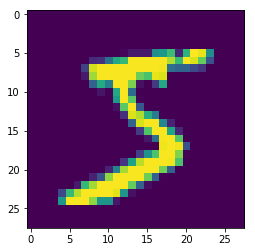

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

#Modulated Vanilla Architecture with Batch Normalization And Dropout

I also only convolved till i get to 7 kernel

In [10]:
from keras.layers import Activation
from keras.layers import BatchNormalization

model = Sequential()

 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization())
model.add(Convolution2D(10, 3, 3, activation='relu')) # 24
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu')) # 22
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2))) # 11

model.add(Convolution2D(10, 1, 1, activation='relu')) # 11
model.add(BatchNormalization())
model.add(Convolution2D(10, 3, 3, activation='relu')) # 9
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu')) # 7
model.add(BatchNormalization())
model.add(Convolution2D(10, 1, activation='relu')) #7
model.add(BatchNormalization())
model.add(Convolution2D(10, 3,3,activation='relu'))#5
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Convolution2D(10, 1,1,activation='relu'))#5
model.add(BatchNormalization())

model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  import sys


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Con

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 10)        910       
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 10)        40        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 16)        1456      
_________________________________________________________________
batch_normalization_3 (Batch (None, 22, 22, 16)        64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 16)        0         
__________

##NOTE

Parameters sums upto <b>9,110</b> after batch normalization is added .I have used batch normalization after every convolutions.The other thing I am doing is increasing the batch size to 128

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, batch_size=128, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test))


Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.4688 - acc: 0.8534 - val_loss: 0.1128 - val_acc: 0.9661
Epoch 2/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.1082 - acc: 0.9668 - val_loss: 0.0617 - val_acc: 0.9797
Epoch 3/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.0753 - acc: 0.9774 - val_loss: 0.0559 - val_acc: 0.9824
Epoch 4/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.0638 - acc: 0.9808 - val_loss: 0.0440 - val_acc: 0.9855
Epoch 5/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0548 - acc: 0.9829 - val_loss: 0.0431 - val_acc: 0.9846
Epoch 6/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0490 - acc: 0.9846 - val_loss: 0.0414 - val_acc: 0.9850
Epoch 7/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.0443 - acc: 0.9859 - val_loss: 0.0346 - 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
print(score)

[0.03577728609871119, 0.9885]


I see that after batch norm and change in batch size , nothing big has happened

In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.03467057e-08 8.52618996e-06 2.12030845e-05 4.46298145e-06
  3.95258581e-07 5.67998590e-08 1.04925842e-11 9.99913335e-01
  1.16295373e-09 5.19302012e-05]
 [4.16205285e-06 4.78646325e-05 9.99911666e-01 1.10082037e-05
  4.19797724e-10 6.95551672e-10 2.46444051e-05 1.77996884e-09
  6.76349430e-07 1.31193728e-11]
 [1.09450013e-08 9.99649405e-01 3.35557706e-06 7.49504977e-07
  6.50518268e-05 4.00008248e-05 5.20270191e-07 2.24828225e-04
  4.83482472e-06 1.12864100e-05]
 [9.98104095e-01 7.64268815e-10 1.42351182e-05 5.36654488e-06
  6.55764598e-09 4.19345088e-06 1.82621472e-03 9.78566783e-10
  3.38151585e-05 1.19432170e-05]
 [1.51468544e-06 2.09437118e-07 1.61487094e-07 1.84428703e-08
  9.82978523e-01 7.53886184e-07 4.49610440e-07 2.97834845e-07
  1.32392506e-05 1.70049667e-02]
 [4.18151203e-09 9.99847531e-01 4.60286742e-07 6.34332986e-09
  3.53856412e-05 1.43182740e-06 2.84981603e-08 1.14005205e-04
  8.80976927e-08 1.01454623e-06]
 [2.10094925e-07 5.34308085e-04 4.62587650e-06 7.68817472e